# Intelligent Agents: Reflex-Based Agents for the Vacuum-cleaner World


## Instructions

Total Points: Undergrads 100 / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a PDF file. 

## Introduction

In this assignment you will implement a simulator environment for an automatic vacuum cleaner robot, a set of different reflex-based agent programs, and perform a comparison study for cleaning a single room. Focus on the __cleaning phase__ which starts when the robot is activated and ends when the last dirty square in the room has been cleaned. Someone else will take care of the agent program needed to navigate back to the charging station after the room is clean.

## PEAS description of the cleaning phase

__Performance Measure:__ Each action costs 1 energy unit. The performance is measured as the sum of the energy units used to clean the whole room.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size and the layout of the room (i.e., it knows $n$). To start, the agent is placed on a random square.

__Actuators:__ The agent can clean the current square (action `suck`) or move to an adjacent square by going `north`, `east`, `south`, or `west`.

__Sensors:__ Four bumper sensors, one for north, east, south, and west; a dirt sensor reporting dirt in the current square.  


## The agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictionary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`. E.g., if the agent is on the north-west corner, `bumpers` will be `{"north" : True, "east" : False, "south" : False, "west" : True}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

In [ ]:
import numpy as np

actions = ["north", "east", "west", "south", "suck"]

def simple_randomized_agent(bumpers, dirty, verbose):
    return np.random.choice(actions)

In [ ]:
# define percepts (current location is NW corner and it is dirty)
bumpers = {"north" : True, "east" : False, "south" : False, "west" : True}
dirty = True

# call agent program function with percepts and it returns an action
simple_randomized_agent(bumpers, dirty, verbose=False)

'suck'

__Note:__ This is not a rational intelligent agent. It ignores its sensors and may bump into a wall repeatedly or not clean a dirty square. You will be asked to implement rational agents below.

## Simple environment example

We implement a simple simulation environment that supplies the agent with its percepts.
The simple environment is infinite in size (bumpers are always `False`) and every square is always dirty, even if the agent cleans it. The environment function returns a performance measure which is here the number of cleaned squares (since the room is infinite and all squares are constantly dirty, the agent can never clean the whole room as required in the PEAS description above). The energy budget of the agent is specified as `max_steps`. 

In [ ]:
def simple_environment(agent, max_steps, verbose = True):
    num_cleaned = 0
    
    for i in range(max_steps):
        dirty = True
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}

        action = agent(bumpers, dirty, verbose)
        if (verbose): print("step", i , "- action:", action) 
        
        if (action == "suck"): 
            num_cleaned = num_cleaned + 1
        
    return num_cleaned

Do one simulation run with a simple randomized agent that has enough energy for 20 steps.

In [ ]:
simple_environment(simple_randomized_agent, max_steps = 20)

step 0 - action: north
step 1 - action: north
step 2 - action: east
step 3 - action: east
step 4 - action: north
step 5 - action: west
step 6 - action: west
step 7 - action: south
step 8 - action: west
step 9 - action: suck
step 10 - action: east
step 11 - action: suck
step 12 - action: suck
step 13 - action: south
step 14 - action: west
step 15 - action: suck
step 16 - action: east
step 17 - action: west
step 18 - action: south
step 19 - action: west


4

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision. 
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement inteligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formated professionally. 
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.


## Task 1: Implement a simulation environment [20 Points]

The simple environment above is not very realistic. Your environment simulator needs to follow the PEAS description from above. It needs to:

* Initialize the environment by storing the state of each square (clean/dirty) and making some dirty. ([Help with random numbers and arrays in Python](https://github.com/mhahsler/CS7320-AI/blob/master/Python_Code_Examples/random_numbers_and_arrays.ipynb))
* Keep track of the agent's position.
* Call the agent function repeatedly and provide the agent function with the sensor inputs.  
* React to the agent's actions. E.g, by removing dirt from a square or moving the agent around unless there is a wall in the way.
* Keep track of the performance measure. That is, track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The easiest implementation for the environment is to hold an 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop until all squares are clean or a predefined number of steps have been reached (i.e., the robot runs out of energy).

The simulation environment should be a function like the `simple_environment()` and needs to work with the simple randomized agent program from above. **Use the same environmnt for all your agent implementations in the tasks below.**

*Note on debugging:* Debugging is difficult. Make sure your environment prints enough information when you use `verbose = True`. Also, implementing a function that the environment can use to displays the room with dirt and the current position of the robot at every step is very useful.  

In [ ]:
def simulation_environment(agent, max_steps, room_size, verbose):
    num_cleaned = 0
    action_count = 0
    #create a 5 by 5 room with squares having a 20% chance of being dirty (true)
    room = np.random.choice([True, False], size = (room_size, room_size), p = [.2, .8])
    #generate random position in room for agent to start at
    row_pos, col_pos = np.random.randint(room_size), np.random.randint(room_size)
    if (verbose): 
        print("room:")
        print(room)
        print("starting position: ( row:", row_pos, ", col:", col_pos,")\n")
    
    for action_count in range(max_steps): 
        #have bumpers check for wall
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}
        #check for west or east wall
        if (col_pos==0):
            bumpers["west"]=True
        elif (col_pos==(room_size-1)):
            bumpers["east"]=True
        #check for north or south wall
        if (row_pos==0):
            bumpers["north"]=True
        elif (row_pos==(room_size-1)):
            bumpers["south"]=True
        #get action from agent using bumper and dirty sensors
        if (verbose): print("step", action_count , "- position before action ( row:", row_pos, ", col:", col_pos,")")
        action = agent(bumpers, dirty=room[row_pos][col_pos], verbose=verbose)
        #clean square
        if (action == "suck"): 
            num_cleaned = num_cleaned + 1
            room[row_pos][col_pos]=False
        #move north
        elif (action == "north" and not bumpers["north"]): row_pos = row_pos - 1
        #move south
        elif (action == "south" and not bumpers["south"]): row_pos = row_pos + 1
        #move east
        elif (action == "east" and not bumpers["east"]): col_pos = col_pos + 1
        #move west
        elif (action == "west" and not bumpers["west"]): col_pos = col_pos - 1
        #check if agent is done cleaning
        elif (action == "complete"): break
        if (verbose): print("step", action_count , "- action:", action, "- position after action ( row:", row_pos, ", col:", col_pos,")") 

    if (verbose): 
        print("\nroom:")
        print(room)
        print("ending position: ( row:", row_pos, ", col:", col_pos,")")
        print("number of actions:", action_count)
        print("number of cleaned tiles:", num_cleaned)

    return action_count

## Task 2:  Implement a simple reflex agent [10 Points] 

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking. Implement the agent program as a function.

_Note:_ Agents cannot directly use variable in the environment. They only gets the percepts as the arguments to the agent function.

In [ ]:
def simple_reflex_agent(bumpers, dirty, verbose):
    #clean square if dirty
    if dirty:
        if (verbose): print("\tagent is cleaning square")
        return "suck"
    #get available movement directions based on bumpers
    valid_directions = [k for k, v in bumpers.items() if v == False]
    #pick random direction
    return np.random.choice(valid_directions)

## Task 3: Implement a model-based reflex agent [20 Points]

Model-based agents use a state to keep track of what they have done and perceived so far. Your agent needs to find out where it is located and then keep track of its current location. You also need a set of rules based on the state and the percepts to make sure that the agent will clean the whole room. For example, the agent can move to a corner to determine its location and then it can navigate through the whole room and clean dirty squares.

Describe how you define the __agent state__ and how your agent works before implementing it. ([Help with implementing state information on Python](https://github.com/mhahsler/CS7320-AI/blob/master/Python_Code_Examples/store_agent_state_information.ipynb))

####__Agent States__
Agent state information is stored as member variables of a class.

This model-based reflex agent stores 2 states:


1.   Tracking whether the agent is finding a corner or cleaning the room.
2.   Tracking the direction of the agent while it is cleaning the room.

####__Agent Implementation__
When starting, the agent must find the north-west corner of the room before starting to clean the room.

Stage 1: Finding corner

*   The agent will move west until it senses that it is near the west wall.
*   Then it will do the same with the north wall thus becoming in the north-west corner.
*   After, the agent will switch it's locator state to false meaning that it is time to clean the room.

Stage 2: Cleaning the room
*    The agent will begin to go towards the east wall.
*    If the agent senses that it is close to the wall it is moving towards, it will move south and turn around (west).
*    After completing each row (east or west), the agent will check if it is near the south wall.
*    If near the south wall, the agent will be finished from cleaning the room.

In [ ]:
class Model_Based_Reflex_Agent:
    def __init__(self):
        #if locator is true, agent is trying to locate top left corner of room. if false, agent is cleaning room
        self.locator = True
        self.direction = "null"
    
    def act(self, bumpers, dirty, verbose):
        if (verbose): print("\tagent is finding corner") if self.locator else print("\tagent is cleaning room")
        #clean square if dirty
        if dirty:
          return "suck";
        #find corner or clean based on locator state
        if self.locator:
            #if corner is found, change to cleaning mode
            if bumpers["west"] and bumpers["north"]:
                self.locator=False
                self.direction="east"
                if (verbose): print("AGENT IS NOW CLEANING ROOM")
            #go west until at wall
            elif not bumpers["west"]:
                return "west"
            #go north until at wall
            elif not bumpers["north"]:
                return "north"
        #clean room row by row
        if not self.locator:
            if (verbose): print("\tagent is going east") if self.direction=="east" else print("\tagent is going west")
            #if near wall of direction, move south and change direction
            if bumpers[self.direction]:
                #switch directions
                if self.direction=="east":
                    self.direction="west"
                else:
                    self.direction="east"
                #if south bumper is near wall, room has been completely cleaned
                if bumpers["south"]:
                    if (verbose): print("\tagent has finished cleaning room")
                    #reset agent states
                    self.locator = True
                    self.direction = "null"
                    return "complete"
                else:
                    return "south"
            #if not near wall of direction, continue moving in same direction
            else:
                return self.direction

## Task 4: Simulation study [30 Points]

Compare the performance (the performance measure is defined in the PEAS description above) of the agents using  environments of different size. E.g., $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Use 100 random runs for each. Present the results using tables and graphs. Discuss the differences between the agents. 
([Help with charts and tables in Python](https://github.com/mhahsler/CS7320-AI/blob/master/Python_Code_Examples/charts_and_tables.ipynb))

In [ ]:
agent1 = Model_Based_Reflex_Agent()
#Run 100 tests for each agent in a 5x5 sized room with 50 max steps.
room_5x5 = {
    "randomized agent" : list(simulation_environment(agent=simple_randomized_agent, max_steps=50, room_size=5, verbose = False) for _ in range(100)),
    "simple reflex agent" : list(simulation_environment(agent=simple_reflex_agent, max_steps=50, room_size=5, verbose = False) for _ in range(100)),
    "model-based reflex agent" : list(simulation_environment(agent=agent1.act, max_steps=50, room_size=5, verbose = False) for _ in range(100))
}
#Run 100 tests for each agent in a 10x10 sized room with 150 max steps.
room_10x10 = {
    "randomized agent" : list(simulation_environment(agent=simple_randomized_agent, max_steps=150, room_size=10, verbose = False) for _ in range(100)),
    "simple reflex agent" : list(simulation_environment(agent=simple_reflex_agent, max_steps=150, room_size=10, verbose = False) for _ in range(100)),
    "model-based reflex agent" : list(simulation_environment(agent=agent1.act, max_steps=150, room_size=10, verbose = False) for _ in range(100))
}
#Run 100 tests for each agent in a 100x100 sized room with 15000 max steps.
room_100x100 = {
    "randomized agent" : list(simulation_environment(agent=simple_randomized_agent, max_steps=15000, room_size=100, verbose = False) for _ in range(100)),
    "simple reflex agent" : list(simulation_environment(agent=simple_reflex_agent, max_steps=15000, room_size=100, verbose = False) for _ in range(100)),
    "model-based reflex agent" : list(simulation_environment(agent=agent1.act, max_steps=15000, room_size=100, verbose = False) for _ in range(100))
}

In [ ]:
mean_5x5 = np.mean(list(room_5x5.values()), axis = 1)
print(f"5x5 room mean performance: {mean_5x5}")
mean_10x10 = np.mean(list(room_10x10.values()), axis = 1)
print(f"10x10 room mean performance: {mean_10x10}")
mean_100x100 = np.mean(list(room_100x100.values()), axis = 1)
print(f"100x100 room mean performance: {mean_100x100}")

5x5 room mean performance: [49.   49.   33.24]
10x10 room mean performance: [149.   149.   127.83]
100x100 room mean performance: [14999.   14999.   12102.55]


Fill out the following table with the average performance measure for 100 random runs (you may also create this table with code):

| Size     | Randomized Agent | Simple Reflex Agent | Model-based Reflex Agent |
|----------|------------------|---------------------|--------------------------|
| 5x5     | 49| 49| 33.24|
| 10x10   | 149| 149| 127.83|
| 100x100 | 14999| 14999| 12102.55|

**It's important to note that max steps for each room are 50, 150, and 15000 respectively.

Add charts to compare the performance of the different agents.

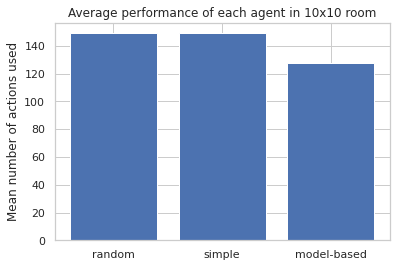

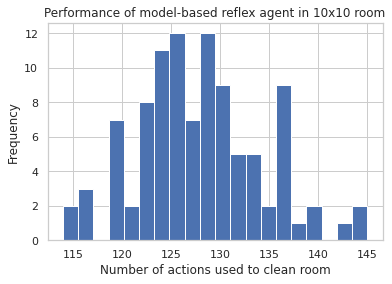

In [ ]:
import matplotlib.pyplot as plt

# add a grid to the plots
import seaborn as sns 
sns.set(style="whitegrid")

#display average performance of each agent in 10x10 room
plt.title("Average performance of each agent in 10x10 room")
agents=["random","simple","model-based"]
plt.bar(agents, mean_10x10)
plt.ylabel("Mean number of actions used")
plt.show()

#display distribution of performance of model-based reflex agent
plt.title("Performance of model-based reflex agent in 10x10 room")
plt.hist(room_10x10["model-based reflex agent"], bins = 20)
plt.xlabel("Number of actions used to clean room")
plt.ylabel("Frequency")
plt.show()

####__Agent Performance and Analysis__
From the data gathered by the test runs, the simple randomized agent and simple reflex agent both hit the max number of actions on every run they attempted. These agents never completed cleaning the room because, they were not capable of tracking the state of their position or the cleanliness of the room.

While testing the implementation of the simple reflex agent, I observed that the agent would almost finish cleaning the room in the number of actions that it was permitted. I found this interesting given that it was moving around the room randomly.

__Model-based Reflex Agent Performance__

Out of the other agents, this was the only agent that was able to consistently complete cleaning the room. This agent would not waste time moving around randomly as it would find the north-west corner and sweep between the east and west wall until it reached the south wall.

The number of actions used by this agent was consistent in a somewhat tight range as shown in the second plot above. The variances in each run can mainly be accounted for by the location that the agent began its test run. While the "spawn" location was random every run which led to a different amount of actions needed to find the room corner, the number of actions to sweep through the room was the same throughout every run (for each given size).

## Task 5: Robustness of the agent implementations [10 Points] 

Describe how **your agent implementations** will perform 

* if it is put into a rectangular room with unknown size, 
* if the cleaning area can have an iregular shape (e.g., a hallway connecting two rooms), or 
* if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors).

####__Rectangular room with unknown size__
Simple randomized agent: The agent will struggle to clean the entire room as it moves around randomly, cleans the floor randomly, and bumps into walls similar to predetermined room sizes.

Simple reflex agent: The agent will struggle to clean the entire room as it moves around randomly similar to predetermined room sizes but will clean every dirty floor tile it comes across.

Model-based reflex agent: The agent will be able to clean the room of any size as long as it is a rectangle or can find a corner of the room. The agent finds a corner and sweeps row by row until it has covered the room.

####__Irregular shaped cleaning area__
Simple randomized agent: The agent will struggle to clean the entire room as it moves around randomly, cleans the floor randomly, and bumps into walls. For example, if there were two connected rooms, the agent wouldn't know how to intentionally move to the other room as it doesn't know its current location.

Simple reflex agent: The agent will struggle to clean the entire room as it moves around randomly. For example, if there were two connected rooms, the agent wouldn't know how to intentionally move to the other room as it doesn't know its current location.

Model-based reflex agent: The agent can clean irregular room as long as it finds a corner to get its location. But, if there were rooms connected by hallways, the agent may lose its location and only partially clean connected rooms as it cleans in a sweeping movement pattern.


####__Room Containing Obstacles__
Simple randomized agent: The agent will struggle to clean the entire room as it moves around randomly. The agent will not be aware of the obstacle and may bump into it.

Simple reflex agent: The agent will struggle to clean the entire room as it moves around randomly. The agent will be aware of the obstacle and can avoid bumping into it.

Model-based reflex agent: The agent will be aware of the obstacle and can avoid bumping into it, but it may affect its sweeping movement pattern and result in not fully cleaning the room.


## Graduate student advanced task: Obstacles [10 Points]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 Bonus Points].

1. Change your simulation environment tor run experiments for the following problem: Add random obstacle squares that also trigger the bumper sensor. The agent does not know where the obstacles are. Observe how this changes the performance of the three implementations.

2. Describe what would need to be done to perform better with obstacles. Add code if you can. 

In [ ]:
# Your code and discussion goes here

## More advanced implementation tasks

* __Agent for and environment with obstacles:__ Implement an agent for an environment where the agent does not know how large the environment is (we assume it is rectangular), where it starts or where the obstacles are. An option would be to always move to the closest unchecked/uncleaned square (note that this is actualy depth-first search).

* __Utility-based agent:__ Change the environment for a $5 \times 5$ room, so each square has a fixed probability of getting dirty again. For the implementation, we give the environment a 2-dimensional array of probabilities. The utility of a state is defined as the number of currebntly clean squares in the room. Implement a utility-based agent that maximizes the expected utility over one full charge which lasts for 100000 time steps. To do this, the agent needs to learn the probabilities with which different squares get dirty again. This is very tricky!

In [ ]:
# Your ideas/code